In [5]:
import cv2
import random
import numpy as np
import math
from matplotlib import pyplot as plt

def umbral(imagen,x,y,w):
    r=int((w-1)/2)
    x = x-r
    y = y-r
    newx = 0
    newy = 0
    promR = 0
    promG = 0
    promB = 0
    divi = 0
    for i in range(w):
        for j in range(w):
            newx=x+i
            newy=y+j
            if newx>=0 and newy>=0 and newx<len(imagen) and newy<len(imagen[0]):
                promR=promR+imagen.item(newx,newy,0)
                promG=promG+imagen.item(newx,newy,1)
                promB=promB+imagen.item(newx,newy,2)
                divi=divi+1
    promR=(promR/divi)
    promG=(promG/divi)
    promB=(promB/divi)
    return promR,promG,promB


img=cv2.imread('sub_1.jpg')
img2=cv2.imread('sub_1.jpg')
a1=max(len(img),len(img2))
b1=max(len(img[0]),len(img2[0]))
img=cv2.resize(img,(b1,a1))
img2=cv2.resize(img2,(b1,a1))
print(a1,b1)
c=2
w_s=11

for i in range(a1):
    for j in range(b1):
        r,g,b = umbral(img,i,j,w_s)
        if r-c>img.item(i,j,0):
            img2.itemset((i,j,0),0)
            img2.itemset((i,j,1),0)
            img2.itemset((i,j,2),0)
        else:
            img2.itemset((i,j,0),255)
            img2.itemset((i,j,1),255)
            img2.itemset((i,j,2),255)
        
#cv2.imshow('resp',img2)
cv2.imwrite('subss.jpg',img2)

510 384


True

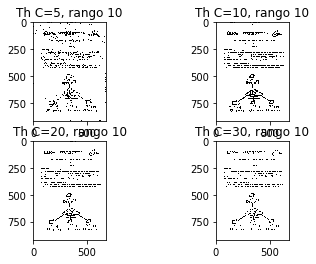

In [10]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

filename = "15.0.jpg"

def mean(i,j,row,col,rang):
	lin = rang
	arriba =  i-lin
	abajo =   i+lin
	isq =	j-lin
	der = 	j+lin
	if arriba < 0:
		arriba = 0
	if abajo > row:
		abajo = row-1
	if isq < 0:
		isq = 0
	if der > col:
		der = col-1
	total = 4*lin*lin
	subimg = tmp[arriba:abajo,isq:der]
	#print(subimg)
	#print(total)
	suma = np.sum(subimg)
	return suma/total

def adap_th(img,row,col,constante,rango):
	for i in range (row):
	    for j in range(cols):
	    	value = mean(i,j,row,cols,rango)
	    	value = value - constante
	    	if img[i,j]>value:
	    		img[i,j]= 255
	    	else:
	    		img[i,j]= 0


img = cv2.imread(filename)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
tmp = img1.copy()
img2 = img1.copy()
img3= img1.copy()
img4= img1.copy()
row,cols = img1.shape

adap_th(img1,row,cols,3,3)
adap_th(img2,row,cols,10,10)
adap_th(img3,row,cols,20,10)
adap_th(img4,row,cols,30,10)


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB))
axarr[0,0].set_title("Th C=5, rango 10")
axarr[0,1].imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))
axarr[0,1].set_title("Th C=10, rango 10")
axarr[1,0].imshow(cv2.cvtColor(img3, cv2.COLOR_GRAY2RGB))
axarr[1,0].set_title("Th C=20, rango 10")
axarr[1,1].imshow(cv2.cvtColor(img4, cv2.COLOR_GRAY2RGB))
axarr[1,1].set_title("Th C=30, rango 10")
cv2.imwrite("ss.jpg",img1)
plt.show()

In [10]:
# THRESHOLDING DEL PROFE

import cv2
import numpy as np 
from matplotlib import pyplot as plt


def threshold_A( img):
	window = 11
	C = 2
	row,col = img.shape[:2]
	img_out = img.copy()
	for i in range(1,row):
		for j in range(1,col):
			y0 = i - int(window/2)
			y1 = i + int(window/2)+1
			x0 = j - int(window/2)
			x1 = j + int(window/2)+1

			if(y0 < 0):
				y0 = 0
			if(y1 > row):
				y1 = row
			if(x0 < 0):
				x0 = 0
			if(x1 > col):
				x1 = col
			block = img[y0:y1,x0:x1]

			thresh = np.mean(block) - C
			if(img[i,j] < thresh):
				img_out[i,j] = 0
			else:
				img_out[i,j] = 255
	return img_out
img=cv2.imread('imagen_Gris.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_out = threshold_A(img)
kernel = np.ones((5,5), np.uint8) 

cv2.imwrite("ssol11.jpg",img_out)

True

In [ ]:
# THRESHOLDING DEL PROFE

import cv2
import numpy as np 
from matplotlib import pyplot as plt


def threshold_A( img):
	window = 11
	C = 2
	row,col = img.shape[:2]
	img_out = img.copy()
	for i in range(1,row):
		for j in range(1,col):
			y0 = i - int(window/2)
			y1 = i + int(window/2)+1
			x0 = j - int(window/2)
			x1 = j + int(window/2)+1

			if(y0 < 0):
				y0 = 0
			if(y1 > row):
				y1 = row
			if(x0 < 0):
				x0 = 0
			if(x1 > col):
				x1 = col
			block = img[y0:y1,x0:x1]
			thresh = np.mean(block) - C
			if(img[i,j] < thresh):
				img_out[i,j] = 0
			else:
				img_out[i,j] = 255
	return img_out

img=cv2.imread('imagen_Gris.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_out = threshold_A(img)
kernel = np.ones((5,5), np.uint8) 

cv2.imwrite("ssol11.jpg",img_out)